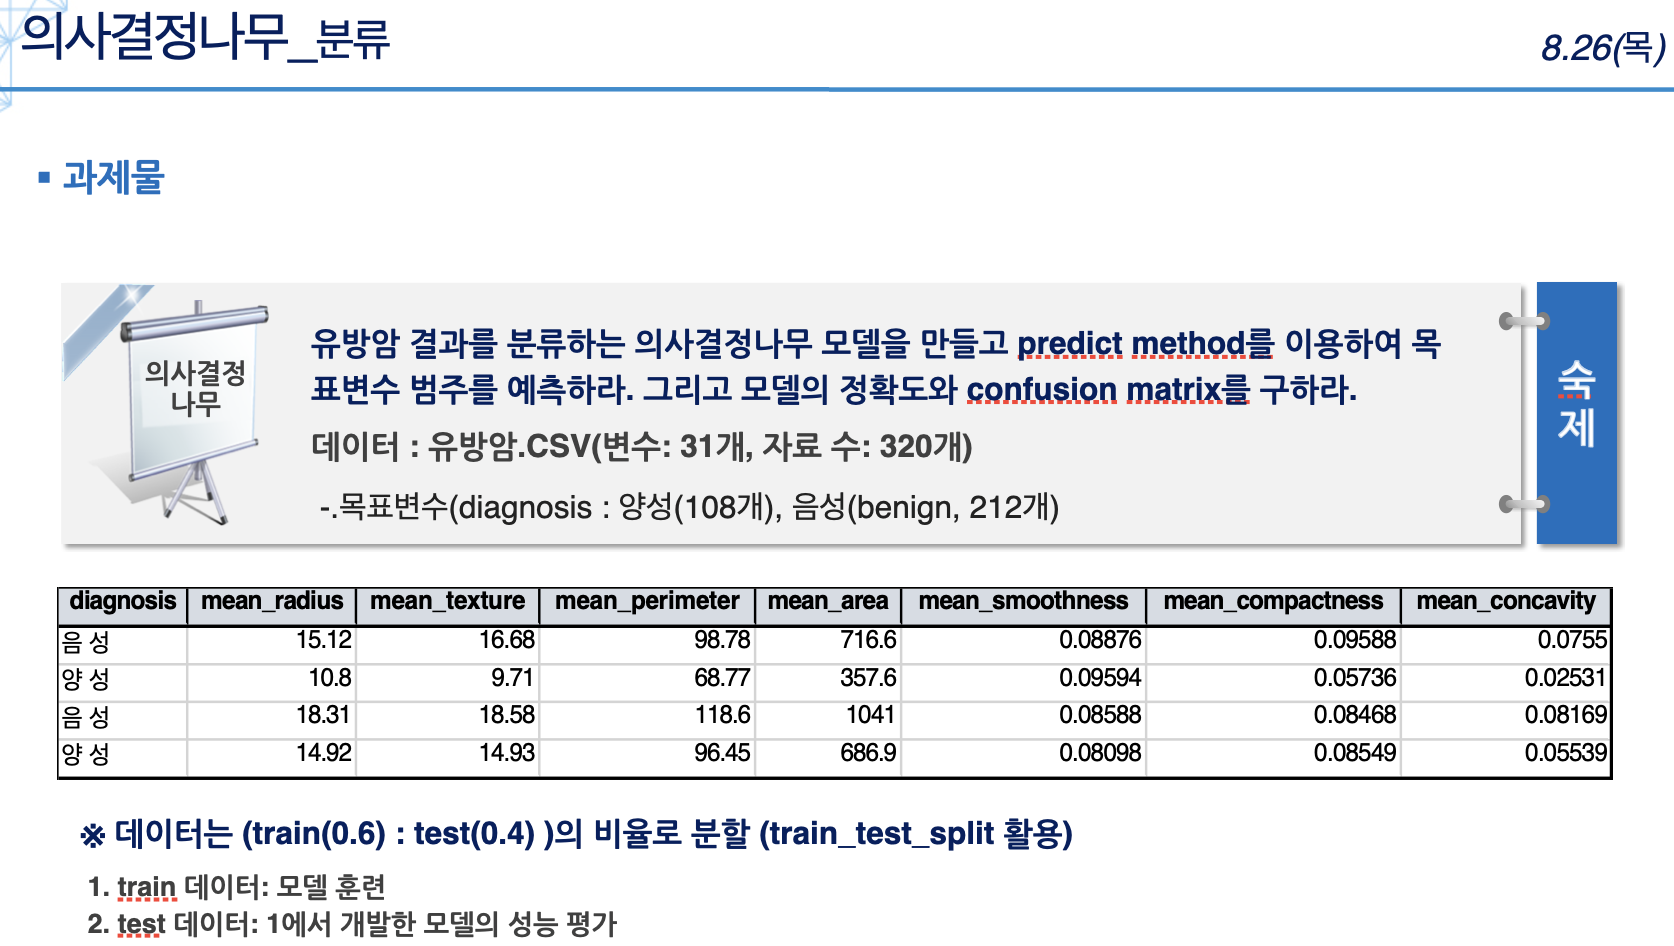

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

matplotlib.rc('font', family='AppleGothic')
plt.rc('font',  family='AppleGothic')

from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from datetime import datetime

#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥: 
## Î∞∞Í≤Ω ÏßÄÏãù Ï°∞ÏÇ¨: Ïú†Î∞©Ïïî ÏïÖÏÑ± Ï¢ÖÏñëÏùÄ Î∂àÍ∑†ÌòïÌïòÍ≤å Ïò§Î™©ÌïòÍ≥† ÏùºÍ∑∏Îü¨ÏßÑ Î™®ÏñëÏùÑ ÎùàÎã§.
##### Ï∂úÏ≤ò: 
http://www.samsunghospital.com/dept/medical/healthSub02View.do?content_id=1750&DP_CODE=RT
## Í∞ÄÏÑ§ ÏÑ§Ï†ï: Ïú†Î∞©Ïïî ÏñëÏÑ± ÏÑ∏Ìè¨Îäî ÏùºÍ∑∏Îü¨ÏßÑ Î™®ÏñëÏùÑ ÎùàÎã§.

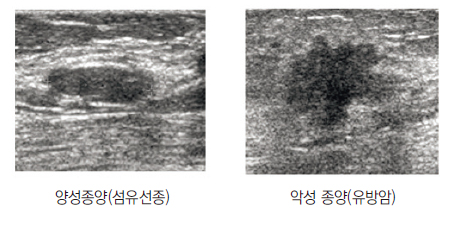

In [8]:
## Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±ÌïòÍ∏∞
df_raw = pd.read_csv('Ïú†Î∞©Ïïî.csv', engine='python', encoding='cp949')
df_raw.head(n=3)

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        ÏùåÏÑ±        15.12         16.68           98.78      716.6   
1        ÏñëÏÑ±        10.80          9.71           68.77      357.6   
2        ÏùåÏÑ±        18.31         18.58          118.60     1041.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5            0.1491             0.3331           0.3327   
1       414.0            0.1436             0.1257           0.1047   
2      1410.0            0.1234             0.2445           0.3538   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  

[3 rows x 31 columns]

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

## Í≤∞Ï∏°Ïπò ÌôïÏù∏


In [10]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

## Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: Î™©Ìëú Î≥ÄÏàòÏù∏ Ïú†Î∞©Ïïî ÏßÑÎã®Í≤∞Í≥ºÎ•º 0(ÏùåÏÑ±),1(ÏñëÏÑ±)Î°ú Î≥ÄÌôò

In [11]:
df_raw.replace({'diagnosis': 'ÏñëÏÑ±'}, 1, inplace=True)
df_raw.replace({'diagnosis': 'ÏùåÏÑ±'}, 0, inplace=True)

In [12]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw.drop("diagnosis",axis=1),df_raw["diagnosis"], test_size = 0.3, random_state=1234)
print('train x data size : {}'.format(df_train_x.shape))
print('train y data size : {}'.format(df_train_y.shape))
print('test x data size : {}'.format(df_test_x.shape))
print('test y data size : {}'.format(df_test_y.shape))

train x data size : (224, 30)
train y data size : (224,)
test x data size : (96, 30)
test y data size : (96,)


# Í∏∞Î≥∏ ÏòµÏÖòÏúºÎ°ú Î™®Îç∏ ÏÉùÏÑ±
train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÌïú Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÍ∞Ä 100%ÏúºÎ°ú train Îç∞Ïù¥ÌÑ∞Ïóê Í≥ºÏ†ÅÌï© ÎêòÏñ¥ÏûàÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.

Îî∞ÎùºÏÑú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏Ïóê ÌååÎùºÎ©îÌÑ∞Î•º ÏµúÏ†ÅÌôîÌï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÎã§.

In [13]:
tree_uncustomized =DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy in train set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy in test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy in train set:1.000
Accuracy in test set:0.896


# Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 1: max_depth ÏµúÎåÄ ÍπäÏù¥ =>6ÏÑ†ÌÉù
- ÏÑ†ÌÉù Ïù¥Ïú†


train, test Ï†ïÌôïÎèÑÍ∞Ä 87.5%Ïù¥ÏÉÅ ÎÜíÏïÑÏßÑ ÏßÄÏ†êÏù¥Î©∞, train, test Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÏùºÏ†ïÌï¥ÏßÄÎäî ÏßÄÏ†êÏù∏ 3 Ïù¥ÌõÑ Í∞íÎì§ Ï§ë,

3ÏùÄ Ìä∏Î¶¨ Î™®ÏñëÏù¥ Í≥ºÏÜå Ï†ÅÌï©Ïù¥ÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Í≥ºÏÜå Ï†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ≥†Ïûê 6ÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.

In [14]:
train_accuracy = []; test_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_min_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_min_max_depth, random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["TestAccuracy"]=test_accuracy

In [15]:
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      1          0.938         0.823
1      2          0.978         0.865
2      3          1.000         0.896
3      4          1.000         0.896
4      5          1.000         0.896
5      6          1.000         0.896
6      7          1.000         0.896
7      8          1.000         0.896
8      9          1.000         0.896
9     10          1.000         0.896

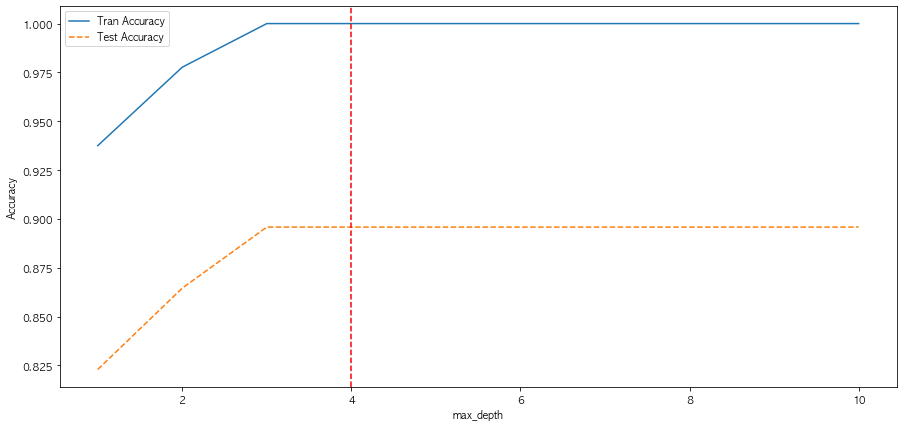

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(para_depth,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='--',label="Test Accuracy")
plt.legend()

plt.ylabel('Accuracy')
plt.xlabel('max_depth')

plt.axvline(x=4, linestyle='--', c='r')

plt.legend()


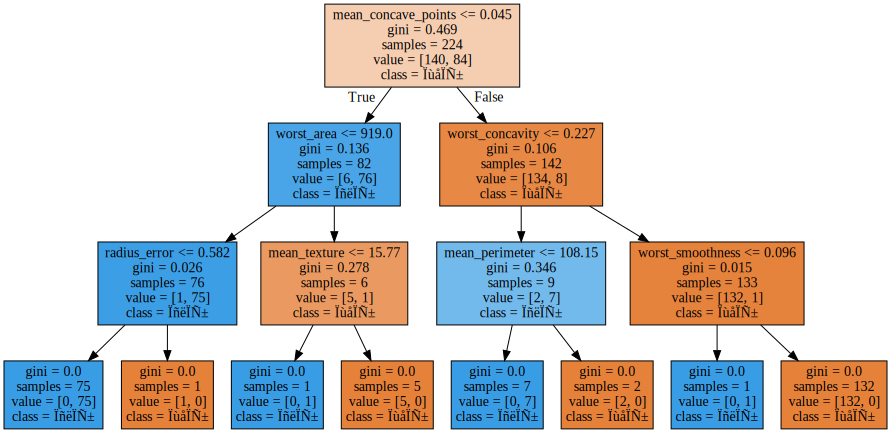

In [17]:
v_feature_name = df_train_x.columns
tree_low=DecisionTreeClassifier(max_depth=6,random_state=1234)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file="tree_high.dot",class_names=["ÏùåÏÑ±","ÏñëÏÑ±"],
                feature_names = v_feature_name,impurity =True,filled=True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 2: Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò =>default(2)ÏÑ†ÌÉù
Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å ÏàòÏóê Îî∞Î•∏ train, test accuracy Î≥ÄÌôîÍ∞Ä ÏóÜÏúºÎØÄÎ°ú 

Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å ÏàòÍ∞Ä Î™®Îç∏ Ï†ïÌôïÎèÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäîÎã§.

Îî∞ÎùºÏÑú defaultÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú Í≤∞Ï†ïÌïòÏòÄÎã§.


In [18]:
train_accuracy = []; test_accuracy =[]
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_sample_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_max_depth, max_depth = 6, random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["TestAccuracy"]=test_accuracy

In [19]:
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0               10          0.987         0.865
1               20          0.987         0.865
2               30          0.987         0.865
3               40          0.987         0.865
4               50          0.987         0.865
5               60          0.987         0.865
6               70          0.987         0.865
7               80          0.987         0.865
8               90          0.987         0.865
9              100          0.987         0.865

# Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å ÏàòÏóê Îî∞Î•∏ train, test accuracy Î≥ÄÌôî

Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å ÏàòÍ∞Ä Î™®Îç∏ Ï†ïÌôïÎèÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäîÎã§.

In [20]:
plt.plot(para_split,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_split,test_accuracy,linestyle='--',label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò')
plt.legend()

#  Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò: default(2)ÏÑ†ÌÉù Í≤∞Í≥º

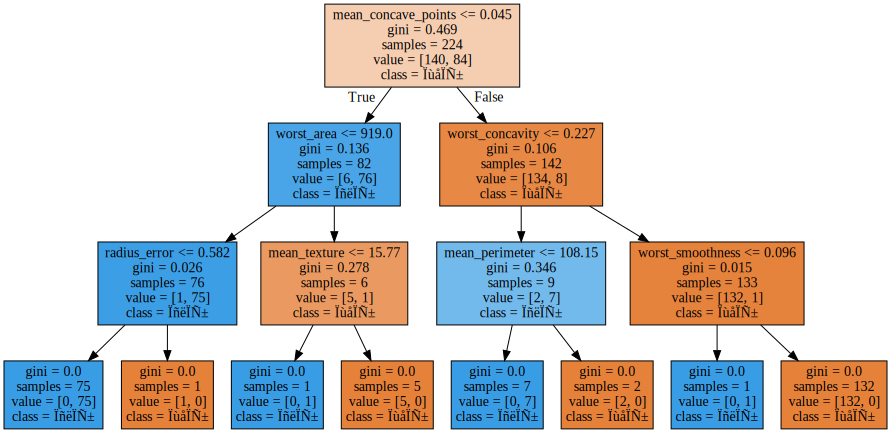

In [21]:
tree_low=DecisionTreeClassifier(max_depth=6, min_samples_split=2,random_state=1234)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file="tree_high.dot",class_names=["ÏùåÏÑ±","ÏñëÏÑ±"],
                feature_names = v_feature_name,impurity =True,filled=True)
with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 3:  ÏûéÏÇ¨Í∑Ä ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò =>2ÏÑ†ÌÉù
ÏûéÏÇ¨Í∑Ä ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò Ï¶ùÍ∞ÄÏóê Îî∞Îùº Î™®Îç∏ Ï†ïÌôïÎèÑÎäî Í∞êÏÜåÌïúÎã§.

Îî∞ÎùºÏÑú train, test accuracyÍ∞Ä 87.5%Ïù¥ÏÉÅÏúºÎ°ú ÎÜíÏùÄ 2,4Î•º ÎπÑÍµêÌïòÏòÄÎã§.

Í≤∞Í≥º: min_samples_leaf=2 Í≤ΩÏö∞, min_samples_leaf=4Î≥¥Îã§ Îçî Í∑†ÌòïÏ†ÅÏù¥Îã§. Îî∞ÎùºÏÑú 2Î•º ÏÑ†ÌÉùÌïòÏòÄÎã§.


In [22]:
train_accuracy = []; test_accuracy =[]
para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_sample_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=v_min_sample_leaf, min_samples_split=2,max_depth = 4, random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["TestAccuracy"]=test_accuracy

In [23]:
df_accuracy_leaf.round(3)

MinSamplesLeaf  TrainAccuracy  TestAccuracy
0               2          0.987         0.906
1               4          0.978         0.885
2               6          0.978         0.865
3               8          0.969         0.875
4              10          0.955         0.875
5              12          0.946         0.802
6              14          0.938         0.823
7              16          0.938         0.823
8              18          0.938         0.823
9              20          0.938         0.823

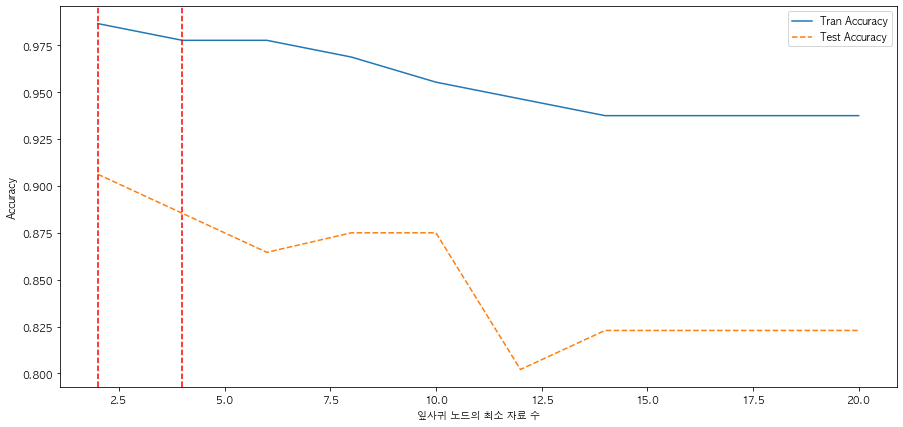

In [24]:
plt.figure(figsize=(15, 7))
plt.plot(para_leaf,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='--',label="Test Accuracy")
plt.axvline(x=2, linestyle='--', c='r')
plt.axvline(x=4, linestyle='--', c='r')
plt.ylabel('Accuracy')
plt.xlabel('ÏûéÏÇ¨Í∑Ä ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò')
plt.legend()

# min_samples_leaf=2 Í≤ΩÏö∞: min_samples_leaf=4Î≥¥Îã§ Îçî Í∑†ÌòïÏ†ÅÏûÑ

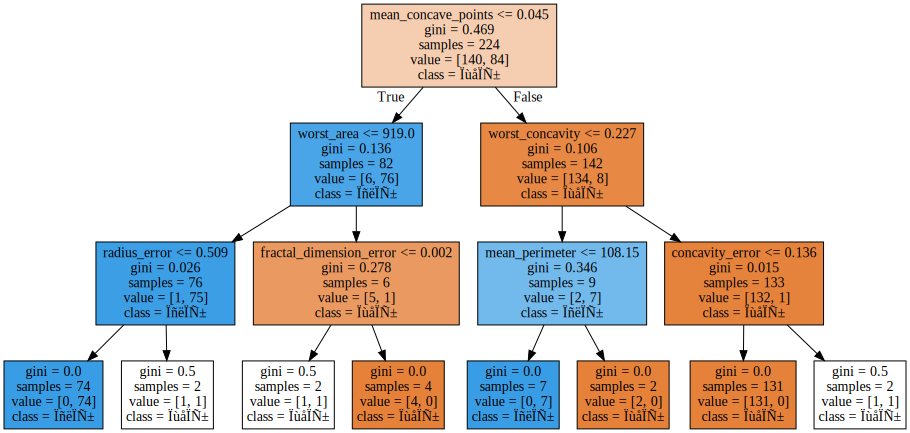

In [25]:
tree_low=DecisionTreeClassifier(max_depth=4,min_samples_leaf=2,min_samples_split=2, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file="tree_low.dot",class_names=["ÏùåÏÑ±","ÏñëÏÑ±"],
                feature_names = v_feature_name,impurity =True,filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# min_samples_leaf=4 Í≤ΩÏö∞: ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∑†ÌòïÏ†ÅÏù¥ÏßÄ ÏïäÏùå

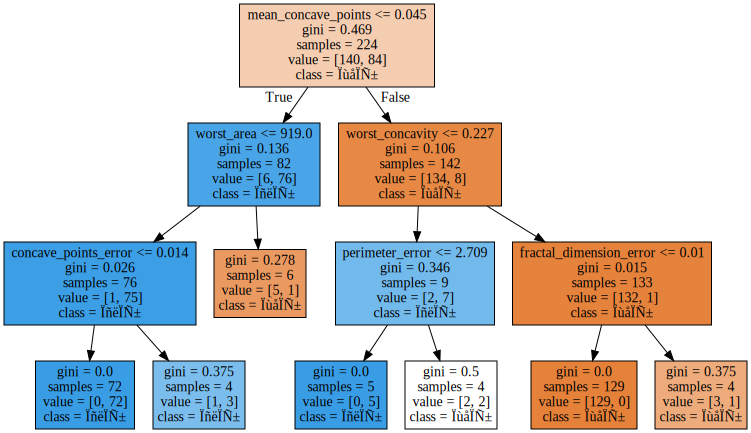

In [26]:
tree_low=DecisionTreeClassifier(max_depth=4,min_samples_leaf=4,min_samples_split=2, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file="tree_low.dot",class_names=["ÏùåÏÑ±","ÏñëÏÑ±"],
                feature_names = v_feature_name,impurity =True,filled=True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# ÏµúÏ¢Ö Î™®Îç∏:
## ÌïòÏù¥Ìçº ÌååÎùºÎ©îÌÑ∞: 
max_depth=4,min_samples_split=2,min_samples_leaf=2

## Ìï¥ÏÑù



### Ïñ¥Îñ§ ÏÑ§Î™Ö Î≥ÄÏàòÍ∞Ä Ïú†Î∞©Ïïî ÏßÑÎã®Ïóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÍ∞Ä?
ÏÑ∏Ìè¨Ïùò ÌèâÍ∑† Ïò§Î™©Ìïú Ï†êÏùò Ïàò(mean concave points)Ïù¥Îã§.

### Ïñ¥Îñ§ ÏÑ∏Ìè¨Í∞Ä Ïú†Î∞©Ïïî ÏñëÏÑ±Ïù∏Í∞Ä?

#### 1Î≤àÏß∏ Í≤ΩÏö∞: 

ÏÑ∏Ìè¨Ïùò ÌèâÍ∑† Ïò§Î™©Ìïú Ï†êÏùò Ïàò(mean concave points)Í∞Ä 0.045Í∞ú Ïù¥ÌïòÏù¥Í≥†, 

ÏµúÎåÄ Î©¥Ï†Å(worst area)Ïù¥ 919Ïù¥ÌïòÏù¥Í≥†, 

Î∞òÍ≤ΩÏùò ÌëúÏ§ÄÏò§Ï∞®Í∞Ä 0.509Î≥¥Îã§ ÏûëÏúºÎ©¥ ÏñëÏÑ±ÏúºÎ°ú Î∂ÑÎ•òÎêúÎã§.

#### 2Î≤àÏß∏ Í≤ΩÏö∞:

ÏÑ∏Ìè¨Ïùò ÌèâÍ∑† Ïò§Î™©Ìïú Ï†êÏùò Ïàò(mean concave points)Í∞Ä 0.045Í∞ú Ï¥àÍ≥ºÏù¥Í≥†, 

ÏµúÎåÄ Ïò§Î™©Ìï®(worst concavity)Ïù¥ 0.227Ïù¥ÌïòÏù¥Í≥†,

ÌèâÍ∑† ÎëòÎ†à(mean perimeter)Í∞Ä 108.15Ïù¥ÌïòÏù¥Î©¥ ÏñëÏÑ±ÏúºÎ°ú Î∂ÑÎ•òÎêúÎã§.



In [27]:
tree_final =DecisionTreeClassifier(max_depth=4,min_samples_leaf=2,min_samples_split=2, random_state=1234)
tree_final.fit(df_train_x,df_train_y) 

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1234)

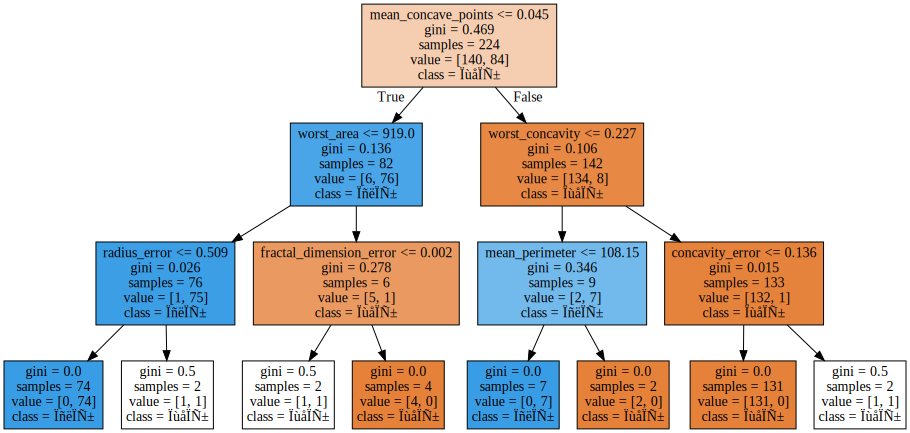

In [28]:
export_graphviz(tree_final,out_file="tree_final.dot",class_names=["ÏùåÏÑ±","ÏñëÏÑ±"],
                feature_names = v_feature_name,impurity =True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä

## üìåÌï¥ÏÑù
Î™®Îç∏ Ï†ïÌôïÎèÑ(Ï†ïÎ∂ÑÎ•òÏú®)Îäî 90.6%Ïù¥Îã§.

ÏùòÌïô Î∂ÑÏïºÏù¥Îã§Î≥¥Îãà Îçî ÎÜíÏùÄ Ï†ïÌôïÎèÑÍ∞Ä ÌïÑÏöîÌï† Ïàò ÏûàÎã§.

Î™©Ìëú Î≥ÄÏàò 1Í∏∞Ï§Ä f1-scoreÏùÄ 0.809Ïù¥Îã§.


In [29]:
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy:0.906
Confusion matrix:
[[68  4]
 [ 5 19]]
              precision    recall  f1-score   support

           0      0.932     0.944     0.938        72
           1      0.826     0.792     0.809        24

    accuracy                          0.906        96
   macro avg      0.879     0.868     0.873        96
weighted avg      0.905     0.906     0.906        96



# ÏÑ§Î™Ö Î≥ÄÏàòÏùò Ï§ëÏöîÎèÑ
## üìåÌï¥ÏÑù
1. Ïú†Î∞©Ïïî ÏñëÏÑ± ÏßÑÎã®Ïóê ÏÑ∏Ìè¨Ïùò ÌèâÍ∑† Ïò§Î™©Ìïú Ï†êÏùò Ïàò(mean concave points)Ïùò ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑÍ∞Ä 77.2%Î°ú Îß§Ïö∞ ÎÜíÎã§.

    Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ Ï°∞ÏÇ¨ÏóêÏÑú ÏÑ§Ï†ïÌïú Í∞ÄÏÑ§Ïù∏ "Ïú†Î∞©Ïïî ÏñëÏÑ± ÏÑ∏Ìè¨Îäî ÏùºÍ∑∏Îü¨ÏßÑ Î™®ÏñëÏùÑ ÎùàÎã§."ÏóêÏÑú ÏòàÏÉÅÌïú Í≤∞Í≥ºÏôÄ Í∞ôÎã§.

2. Ïú†Î∞©Ïïî ÏñëÏÑ± ÏßÑÎã®Ïóê ÏÑ∏Ìè¨Ïùò ÏµúÎåÄ Ïò§Î™©Ìï®, ÏÑ∏Ìè¨ ÏµúÎåÄ Î©¥Ï†Å Î≥ÄÏàòÎèÑ Ï§ëÏöîÌïú Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÎêúÎã§.

2. errorÎ≥ÄÏàòÎì§ÏùÄ ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑÍ∞Ä Í±∞Ïùò 0Ïóê ÏàòÎ†¥ÌïúÎã§.
    Ïù¥Îäî Î≥ÄÏàòÎì§Ïùò Ï∏°Ï†ï Ïò§Ï∞®Ïù¥ÎØÄÎ°ú Ï§ëÏöîÎèÑÍ∞Ä ÏûëÏïÑÏïºÌïòÎäî ÎãπÏó∞Ìûà ÏòàÏÉÅ Í∞ÄÎä•Ìïú Í≤∞Í≥ºÏù¥Îã§.

In [30]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

Feature  Importance
7       mean_concave_points       0.772
26          worst_concavity       0.098
23               worst_area       0.073
2            mean_perimeter       0.031
16          concavity_error       0.010
10             radius_error       0.010
19  fractal_dimension_error       0.007
22          worst_perimeter       0.000
18           symmetry_error       0.000
20             worst_radius       0.000
21            worst_texture       0.000
0               mean_radius       0.000
17     concave_points_error       0.000
25        worst_compactness       0.000
27     worst_concave_points       0.000
28           worst_symmetry       0.000
24         worst_smoothness       0.000
15        compactness_error       0.000
1              mean_texture       0.000
14         smoothness_error       0.000
13               area_error       0.000
12          perimeter_error       0.000
11            texture_error       0.000
9    mean_fractal_dimension       0.000
8             mean_symmetry       0.000
6            mean_concavity       0.000
5          mean_compactness       0.000
4           mean_smoothness       0.000
3                 mean_area       0.000
29  worst_fractal_dimension       0.000

Text(0, 0.5, 'ÏÑ§Î™ÖÎ≥ÄÏàò')

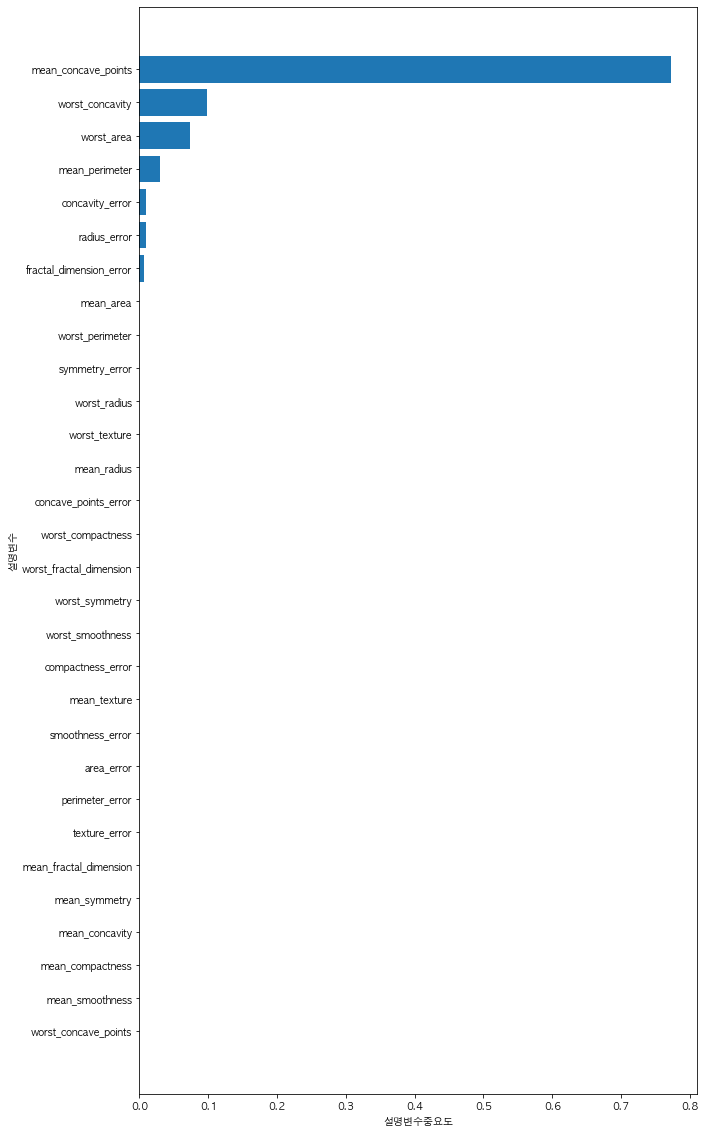

In [31]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.figure(figsize=(10,20))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("ÏÑ§Î™ÖÎ≥ÄÏàòÏ§ëÏöîÎèÑ")
plt.ylabel("ÏÑ§Î™ÖÎ≥ÄÏàò")

In [32]:
#estimator = DecisionTreeClassifier()
#param_grid={"max_depth":para_depth,"min_samples_split":para_split,"min_samples_leaf":para_leaf}
#grid_dt= GridSearchCV(estimator,param_grid,scoring="accuracy",n_jobs=-1)
#grid_dt.fit(df_train_x,df_train_y)

#print("best estimator model:\n{}".format(grid_dt.best_estimator_))
#print("\nbest parameter:\n{}".format(grid_dt.best_params_))
#print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))